In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pywt, math
from dst import get_q_filter_equations,get_filters, system_function
import matplotlib.pyplot as plt
import numpy as np
from dst import compute_abs_error
from dst import build_shapelet
import scipy.signal
from dst import PatternDetector
import matplotlib
from scipy.optimize import root


9


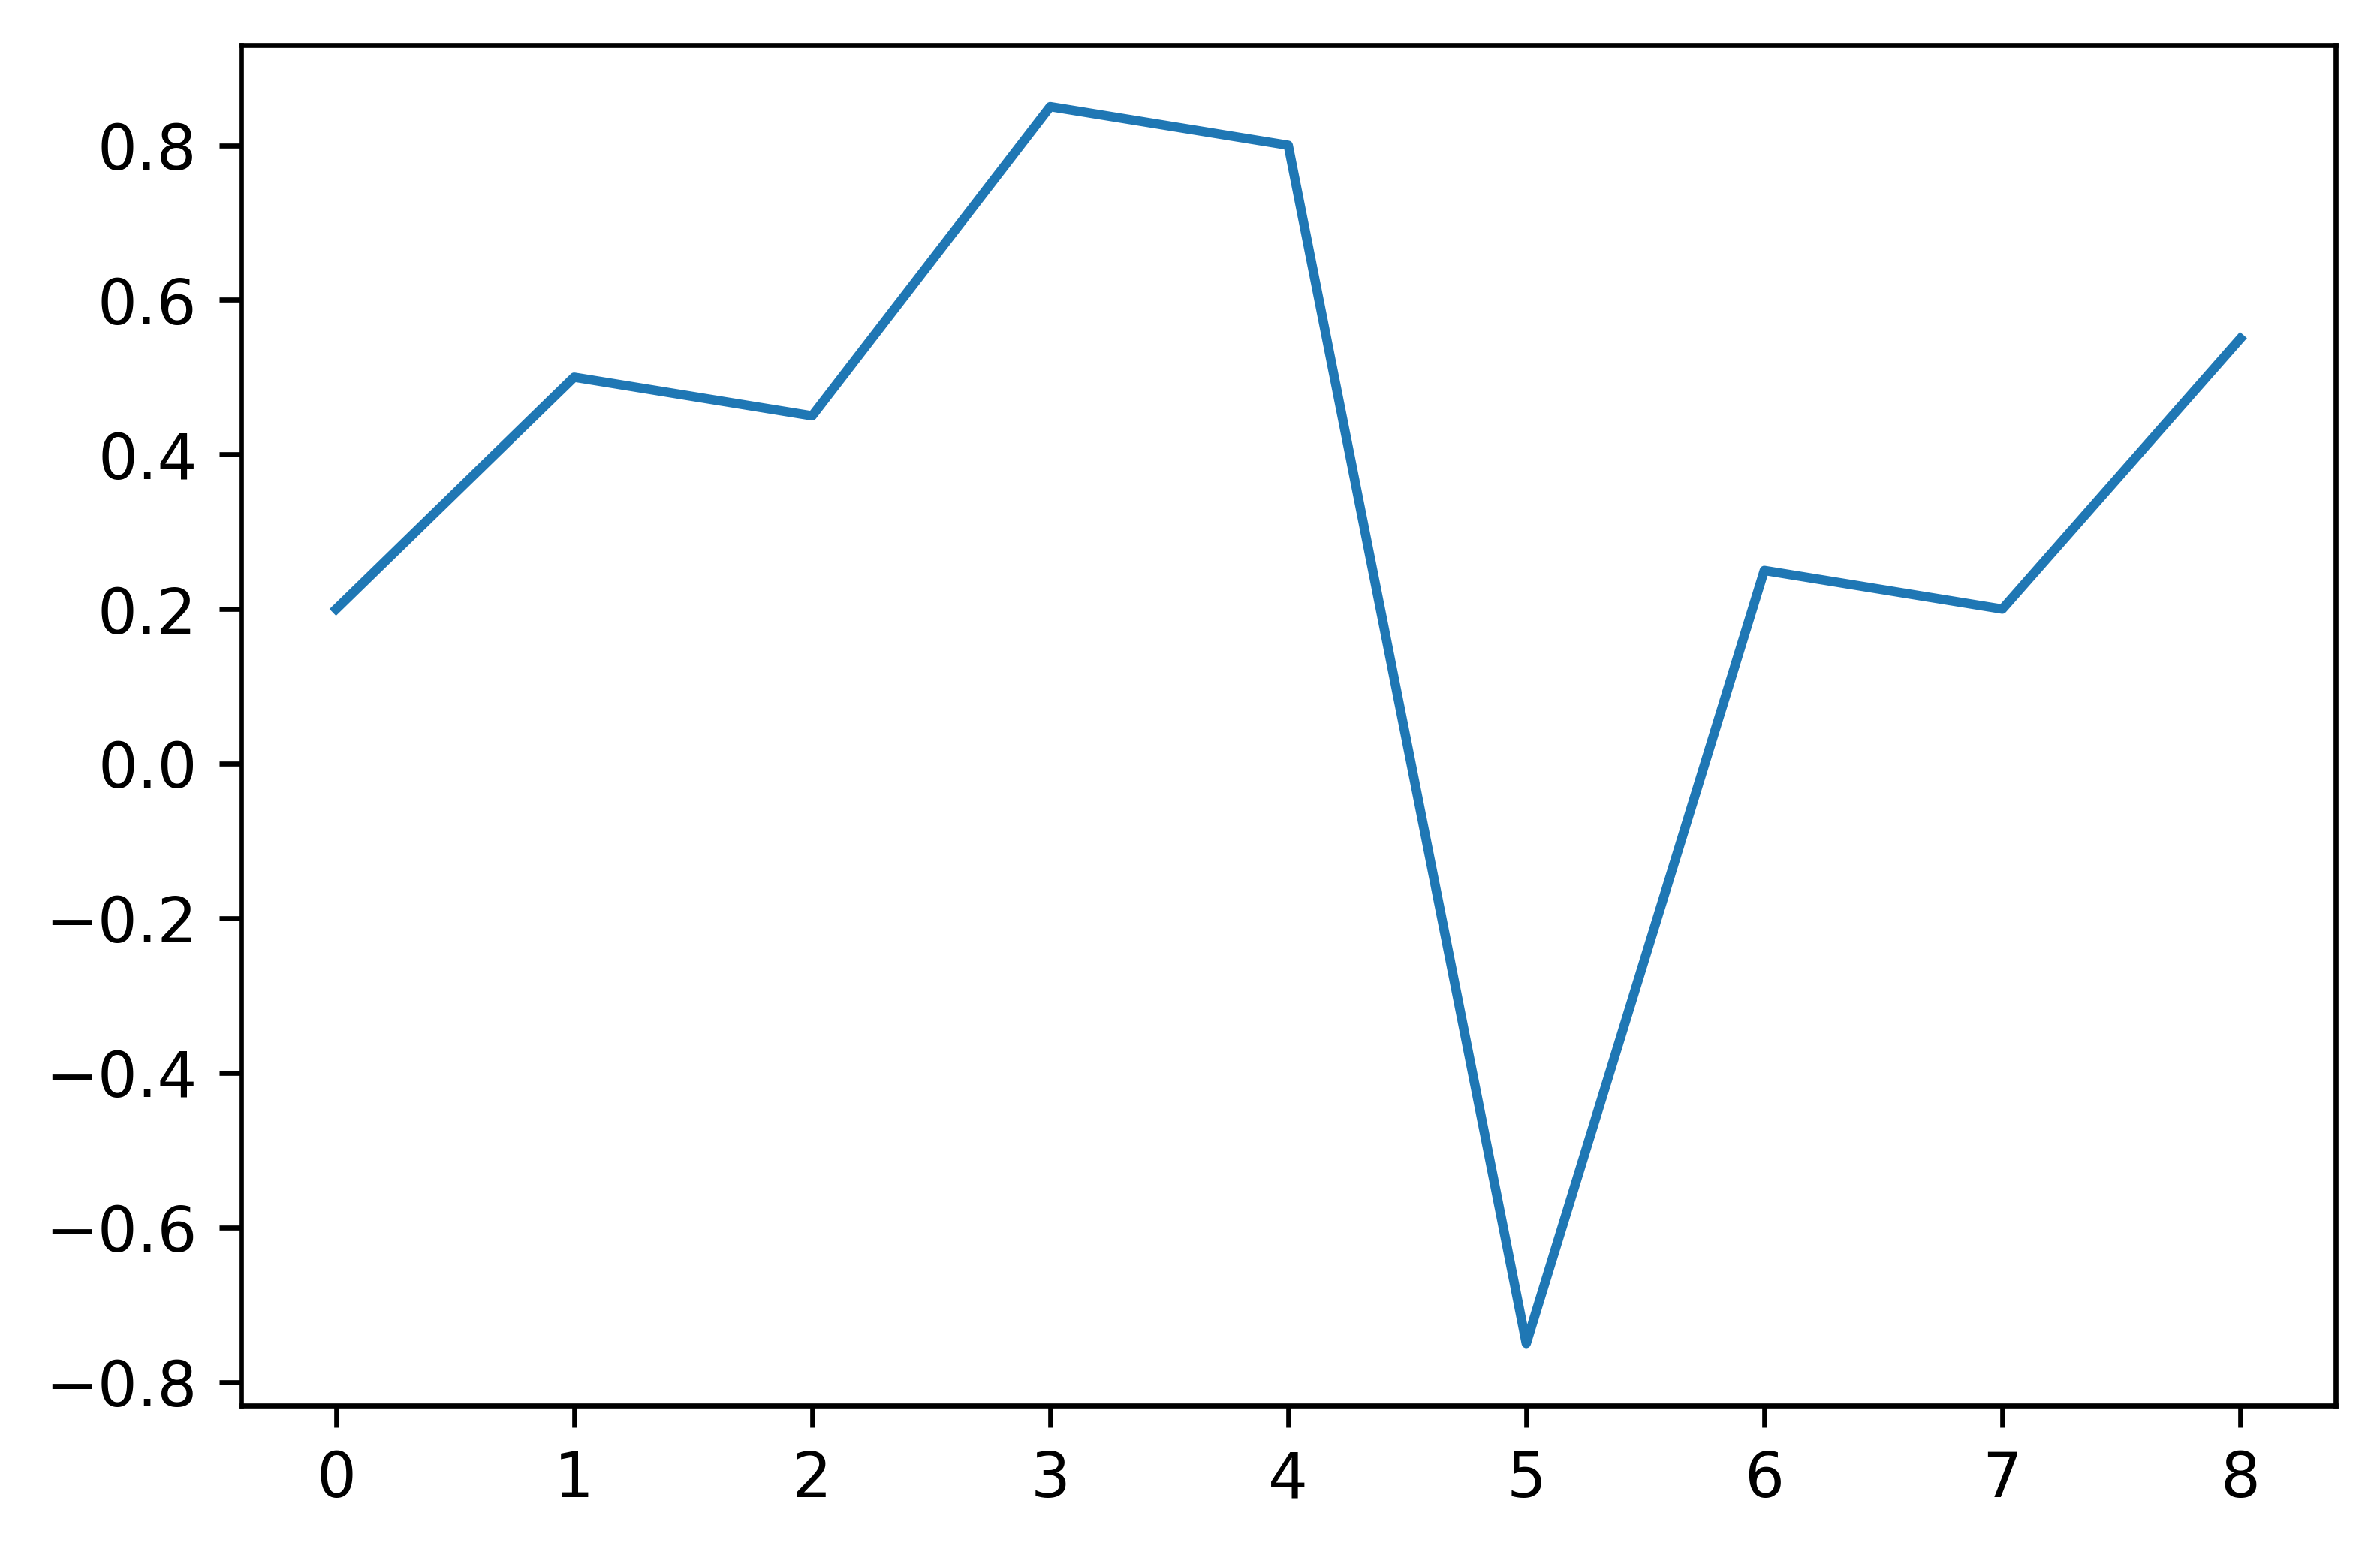

In [3]:
pattern = np.array([0.20, 0.50, 0.45, 0.85, 0.80, -0.75, 0.25, 0.20, 0.55])
matplotlib.pyplot.figure(dpi=600)
plt.plot(np.arange(0, len(pattern), 1), pattern)
print(len(pattern))
plt.show() 

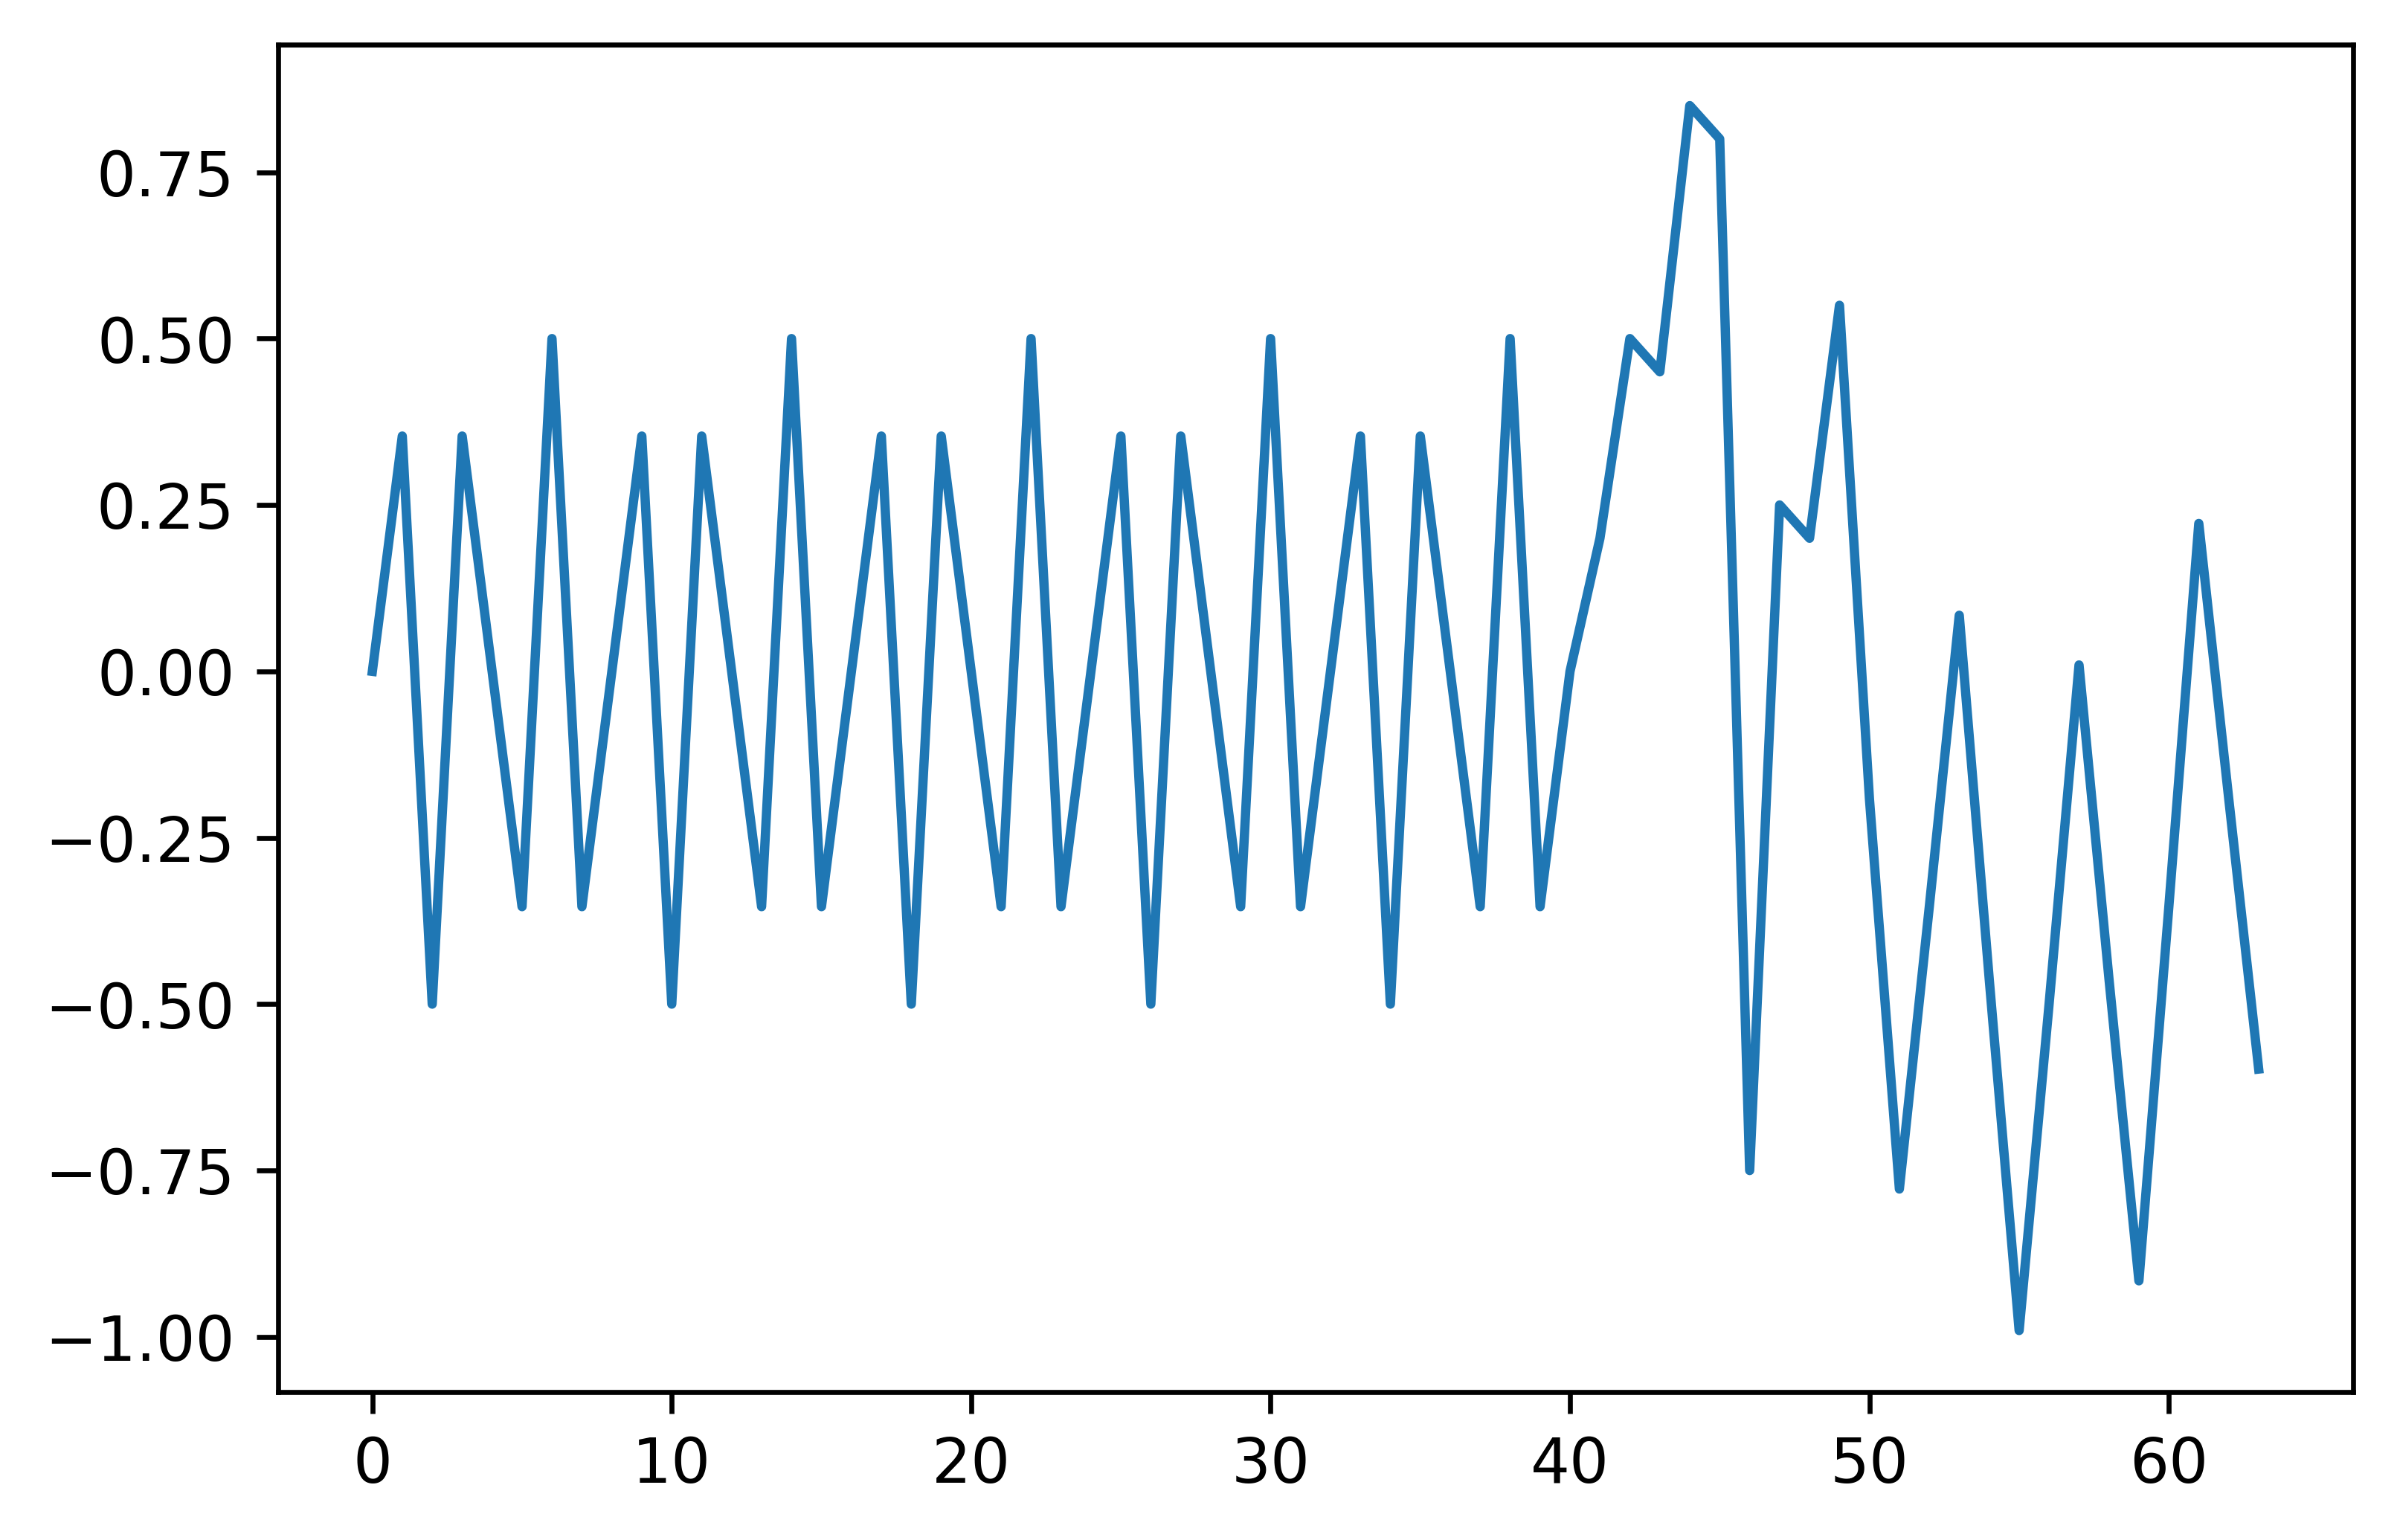

In [4]:
def signal(x, pattern, pattern_start):
    pattern_end = pattern_start + len(pattern) - 1
    if 0 <= x <= pattern_start - 1:
        return math.cos((math.pi*27*x)/8)*math.sin((math.pi*75*x)/8) 
    elif pattern_start <= x <= pattern_end:
        return pattern[int(x) - pattern_start] 
    elif pattern_end + 1 <= x <= 63:
        return math.cos((math.pi*295*x)/32)*math.sin((math.pi*105*x)/32) 

    
# change the position of the pattern to experiment
pattern_start_position = 41

x = np.arange(0, 64, 1)
y = [signal(i, pattern, pattern_start_position) for i in x]

matplotlib.pyplot.figure(dpi=600)
plt.plot(x, y)
plt.show()

In [ ]:
q_symbols, equations = get_q_filter_equations(pattern)
fun = system_function(q_symbols, equations)

sol = root(
        fun, [0 for _ in range(len(q_symbols))], method="hybr"
)
    
print(f"solution: {sol.x}")
print(f"success: {sol.success}")
compute_abs_error(q_symbols, sol.x, equations)
q = sol.x
p, q_bar, p_bar = get_filters(q)
filter_bank = [p, q, p_bar, q_bar]


solution: [ 0.85058133 -0.24960593  0.22199104  0.29414387 -0.1020457  -0.25121801
  0.01967802  0.06705672]
success: True
7.98725775994623e-11
1.73472347597681e-17
-6.93889390390723e-18
4.50096923014534e-11
4.78672931204995e-11
1.24233467725408e-11
1.82169492172724e-17
-7.96834114420237e-18
Absolute Error: 1.85172960265375E-10


In [ ]:
cD, cA = [np.zeros((len(y)//2,)) for _ in range(2)]
for i in range(cD.shape[0]):
    cD[i] = sum([y[(2*i-k+len(y)) % len(y)]*q[k] for k in range(len(q))])
    cA[i] = sum([y[(2*i-k+len(y)) % len(y)]*p[k] for k in range(len(q))])
temp = list(cD)
temp.sort()
print(temp)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


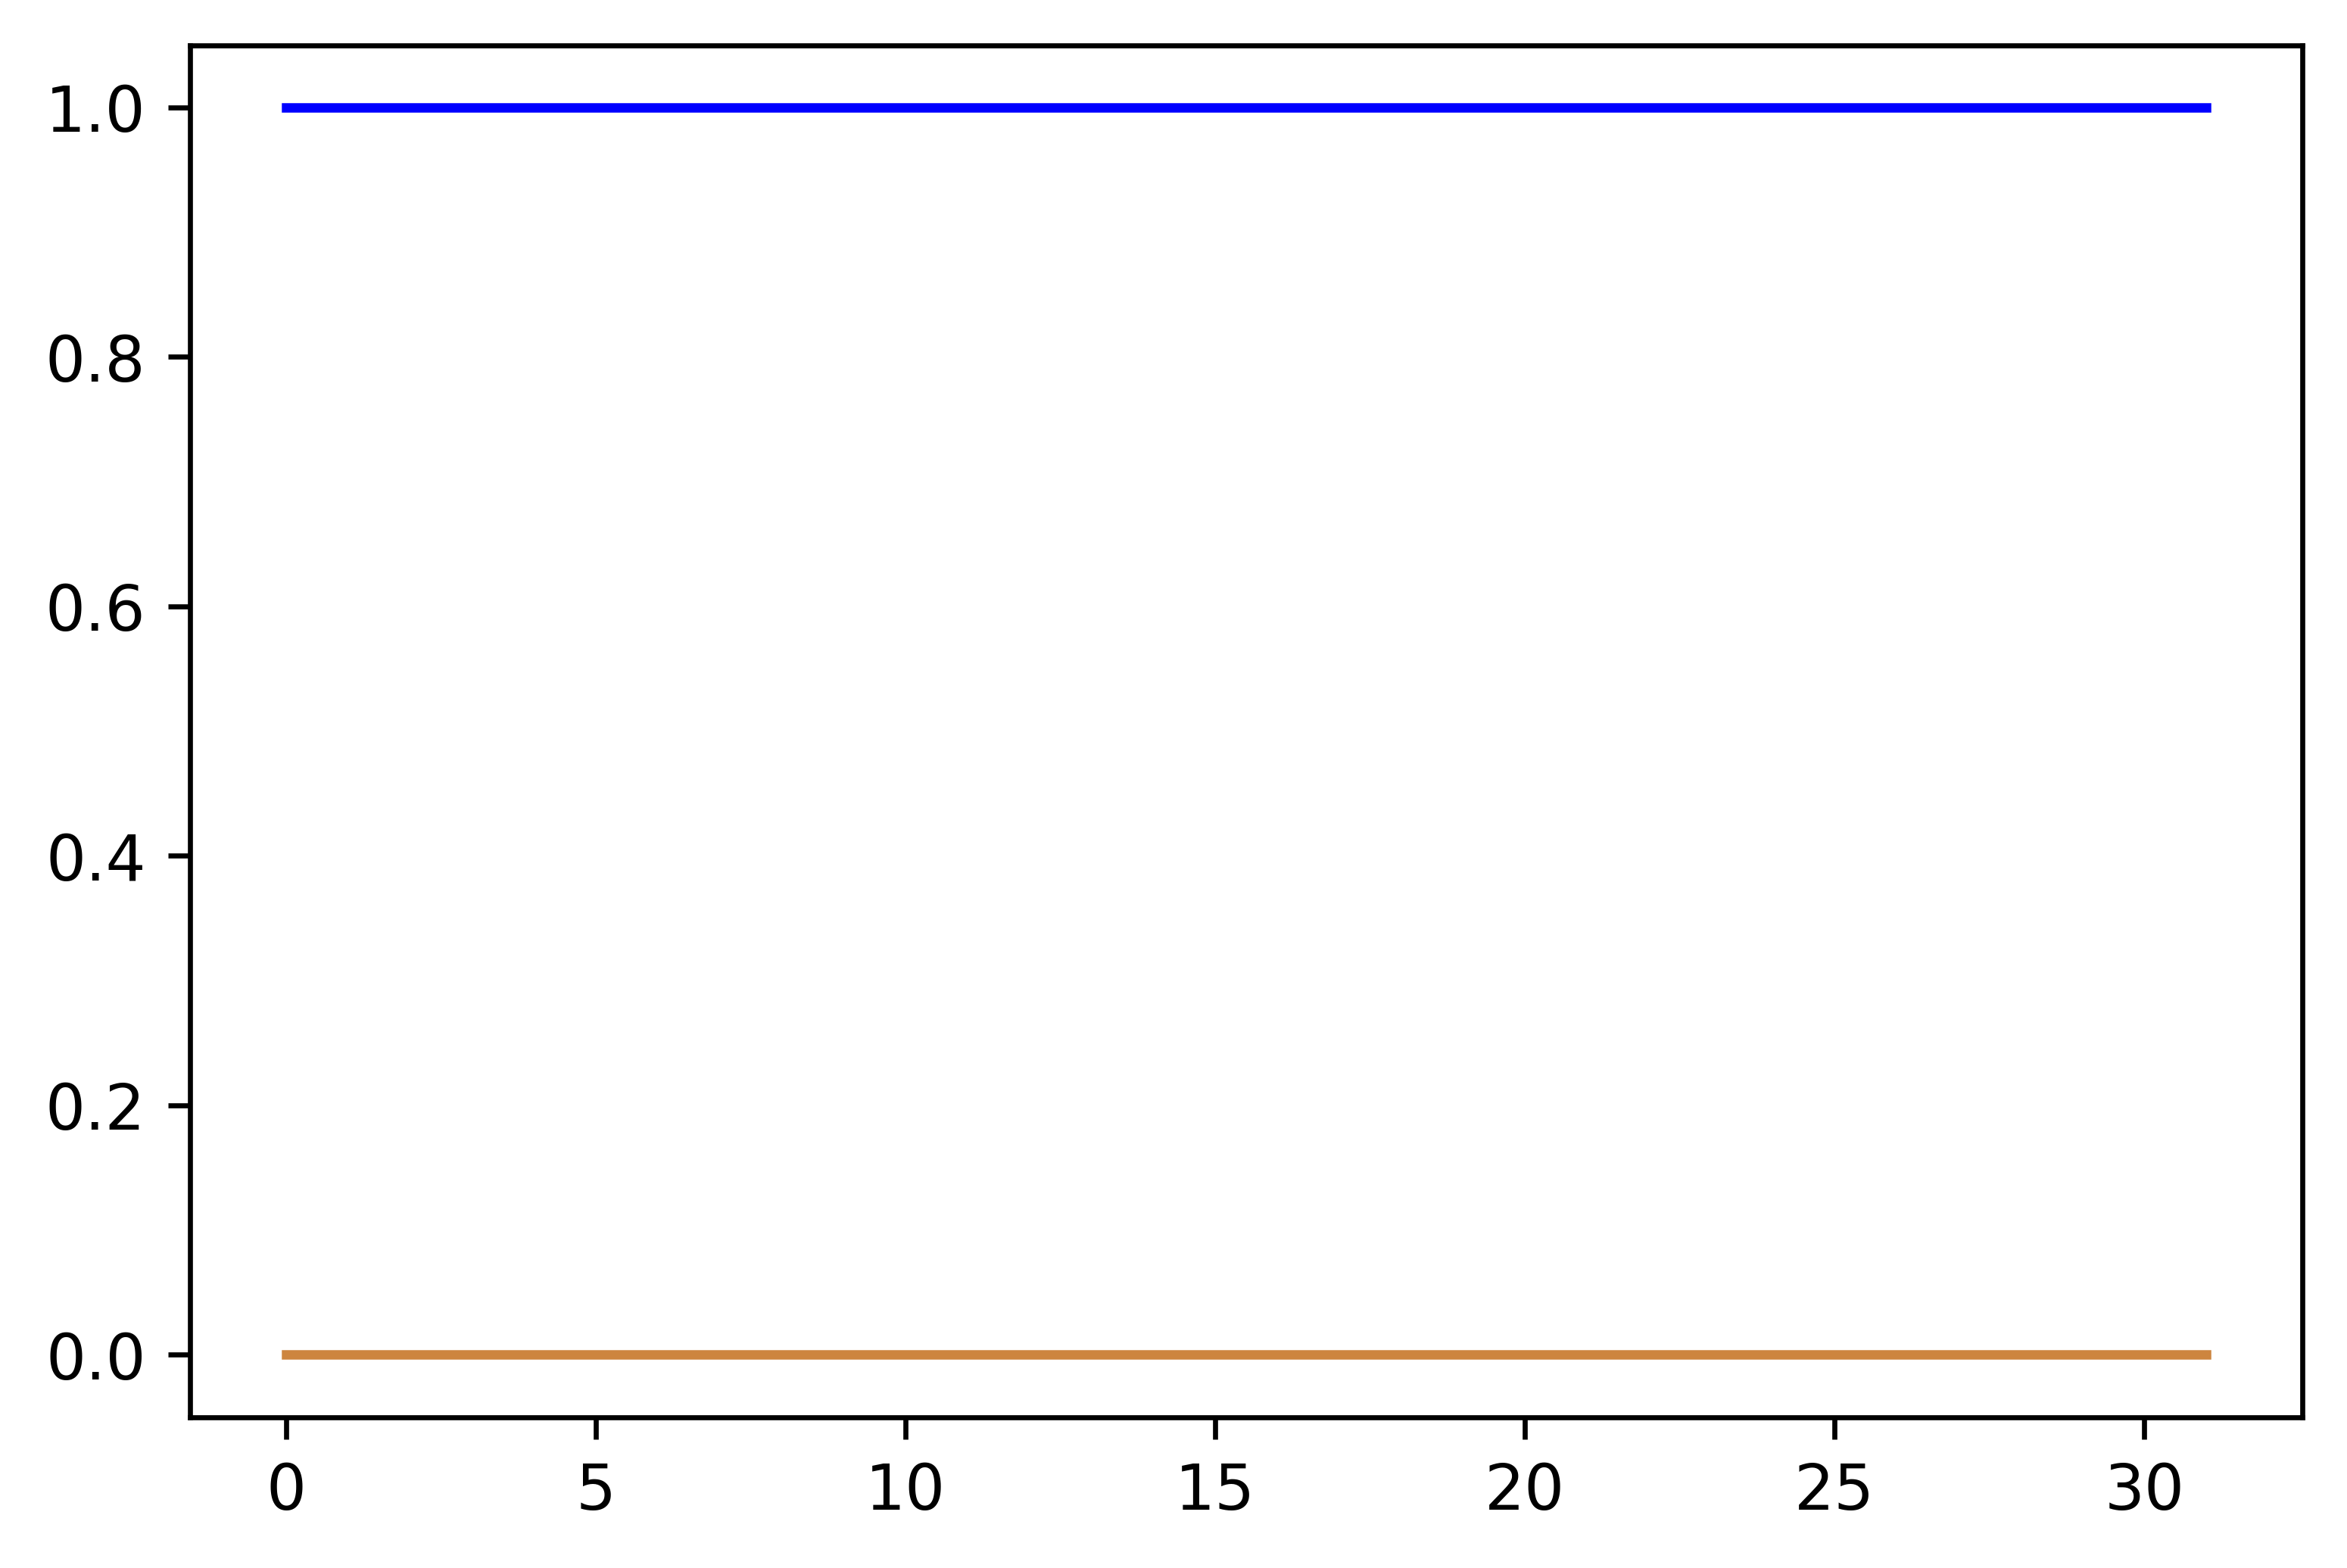

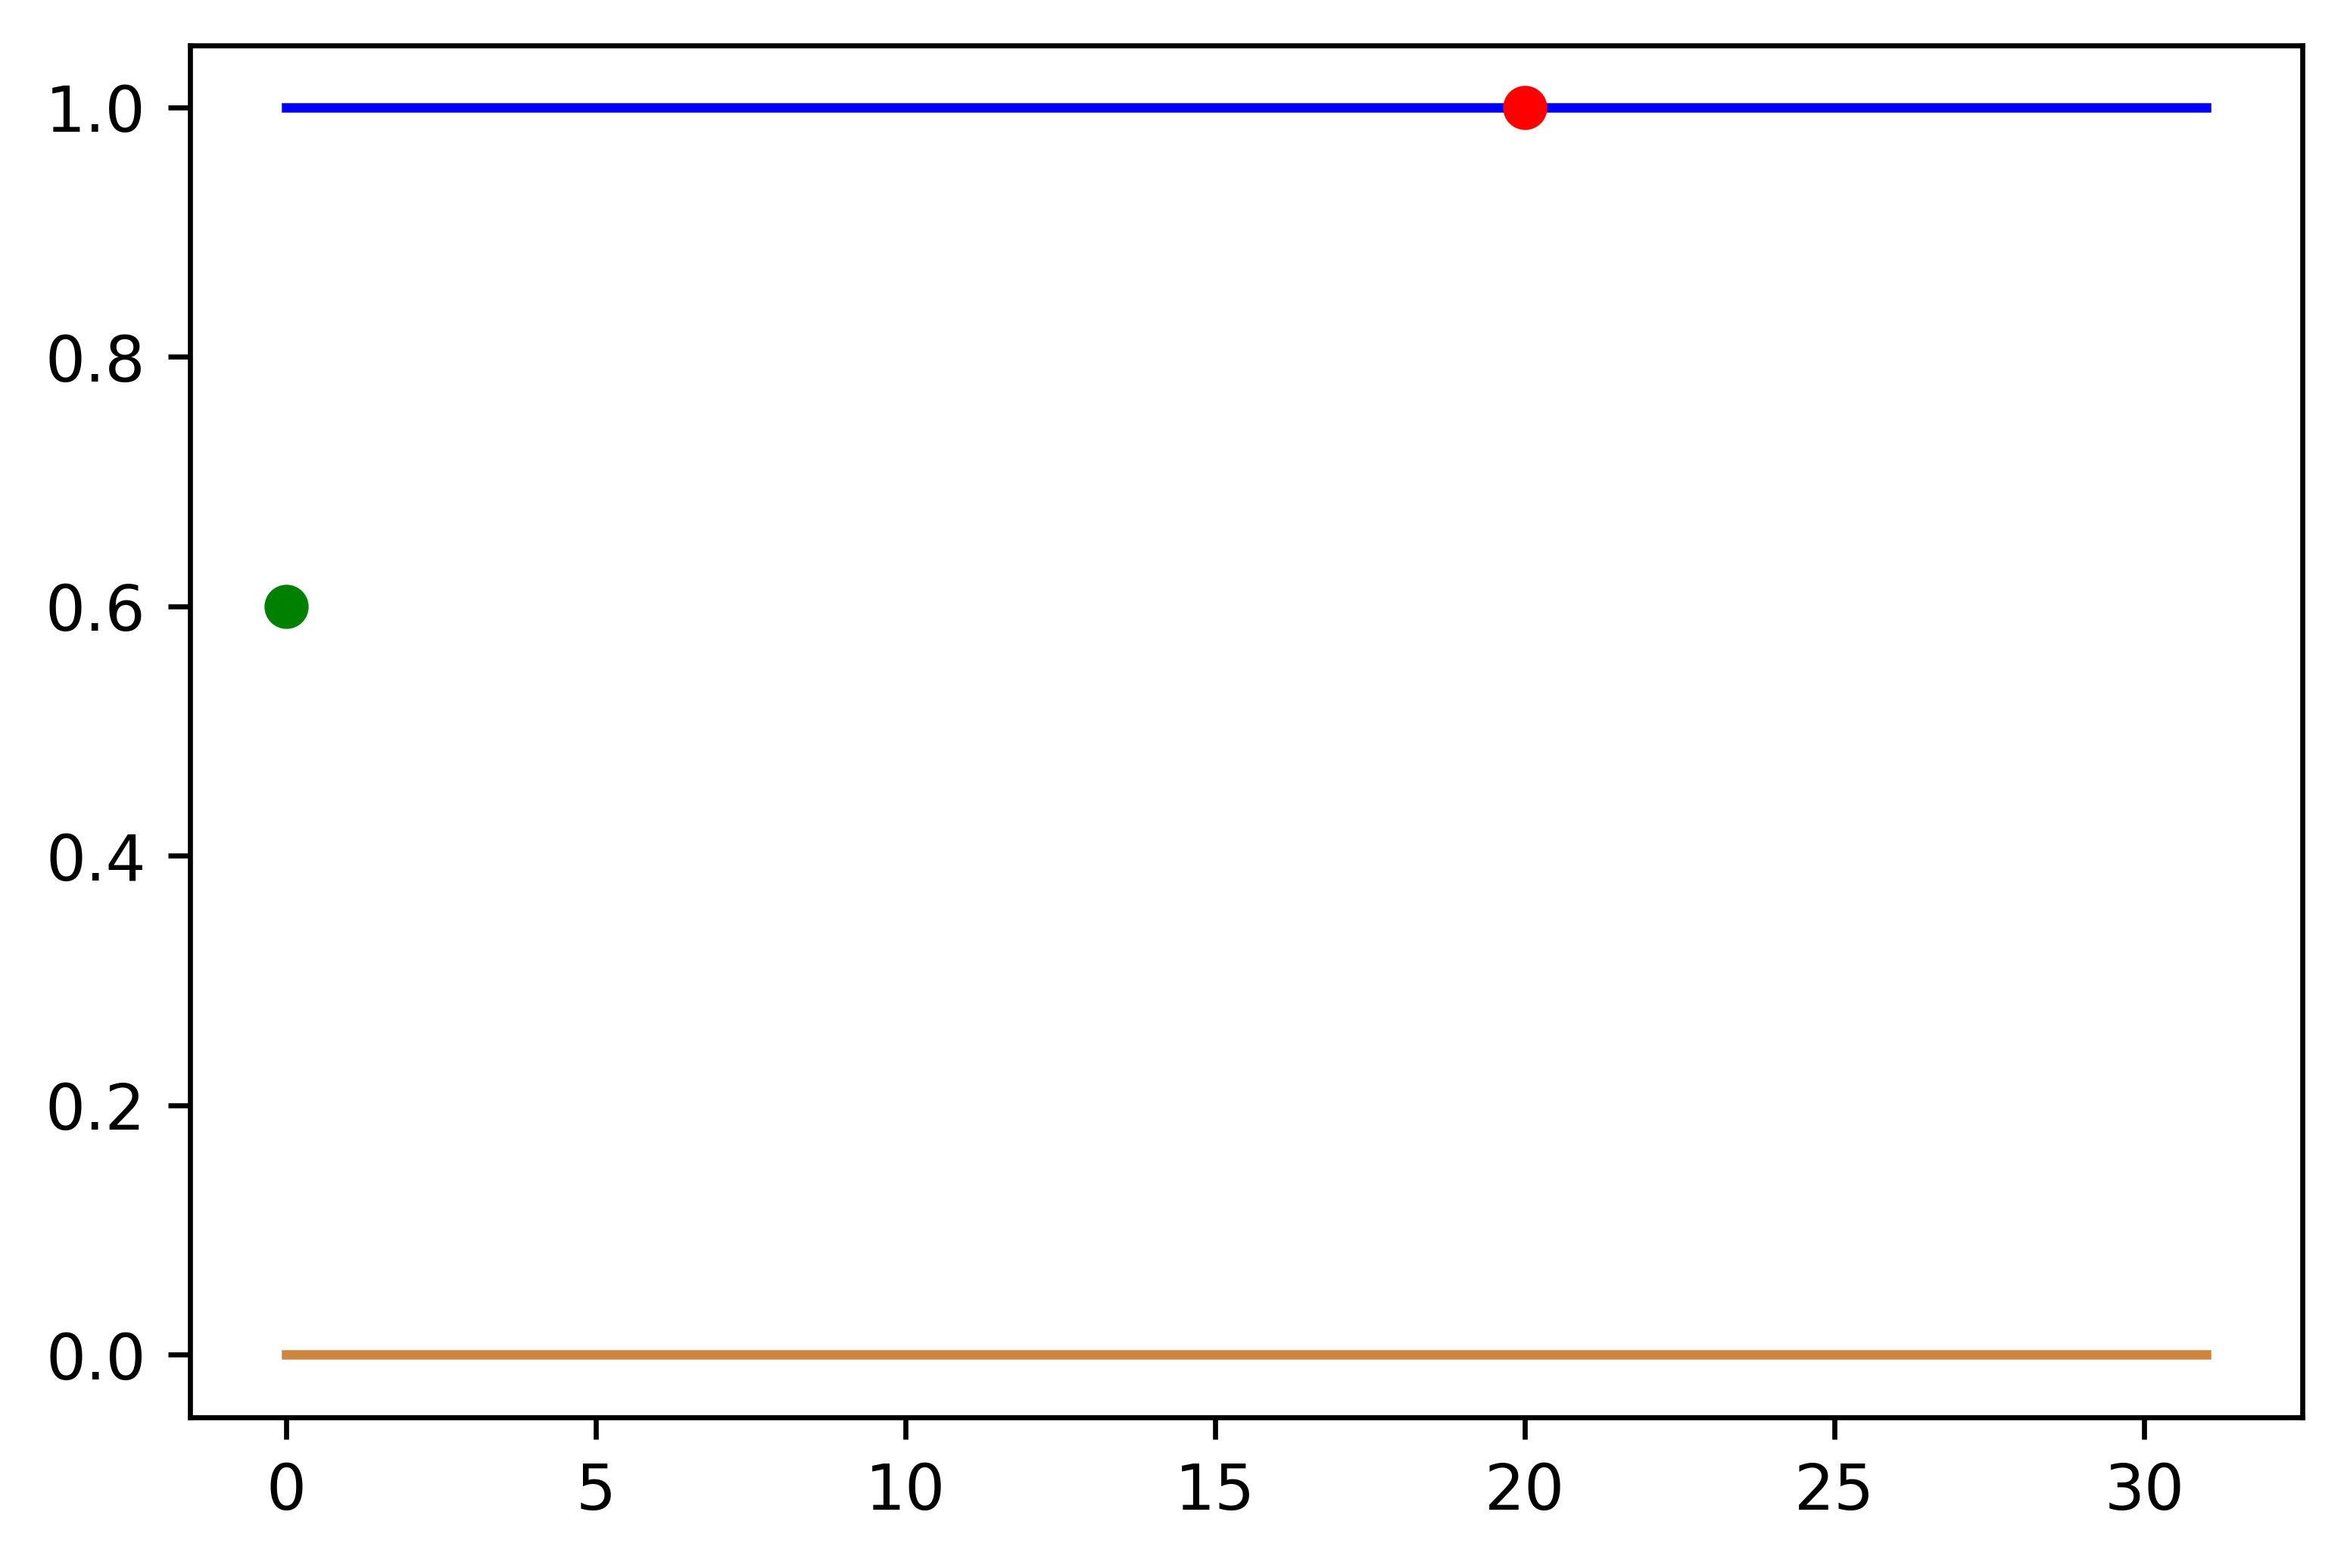

In [ ]:
alpha = 0.1
s = [math.exp(-(np.abs(cD[i])**alpha)) for i in range(len(cD))]
x = [i for i in range(len(cD))]

matplotlib.pyplot.figure(dpi=600)

plt.plot(x, cD, 'peru')
plt.plot(x, s, 'b-')

s_max = max(s)
x1_max = s.index(s_max)

matplotlib.pyplot.figure(dpi=600)
plt.plot(x, cD, 'peru')
plt.plot(x, s, 'b-')
plt.plot(x1_max, 0.60, 'go')
plt.plot(pattern_start_position//2, s[pattern_start_position//2], 'ro')
plt.show()